In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle
import random
import shutil
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import cv2
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

In [3]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [5]:
def extract_features(img_path,model):
    img=image.load_img(img_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    expanded_img_array=np.expand_dims(img_array,axis=0)
    preprocessed_img=preprocess_input(expanded_img_array)
    result=model.predict(preprocessed_img).flatten()
    normalized_result=result/norm(result)
    
    #return normalized_result

In [6]:
filenames = []
for file in os.listdir('D:\deepfashion dataset\images'):
    filenames.append(os.path.join('D:\deepfashion dataset\images',file))
print(len(filenames))
print(filenames[0:5])

13753
['D:\\deepfashion dataset\\images\\1000_031.jpg', 'D:\\deepfashion dataset\\images\\1000_032.jpg', 'D:\\deepfashion dataset\\images\\1000_041.jpg', 'D:\\deepfashion dataset\\images\\1000_042.jpg', 'D:\\deepfashion dataset\\images\\1001_011.jpg']


In [10]:
#feature_list = []

#for file in tqdm(filenames):
   # feature_list.append(extract_features(file,model))
#pickle.dump(feature_list,open('embeddings.pkl','wb'))
#pickle.dump(filenames,open('filenames.pkl','wb'))

In [7]:
feature_list = np.array(pickle.load(open(r'C:\Users\stacy\Downloads\embeddings (2).pkl','rb')))
filenames = pickle.load(open(r'C:\Users\stacy\Downloads\filenames (1).pkl','rb'))

print(np.array(feature_list.shape))
print(np.array(filenames))

[13752  2048]
['D:\\deepfashion dataset\\images\\1000_031.jpg'
 'D:\\deepfashion dataset\\images\\1000_032.jpg'
 'D:\\deepfashion dataset\\images\\1000_041.jpg' ...
 'D:\\deepfashion dataset\\images\\5598_102.jpg'
 'D:\\deepfashion dataset\\images\\5599_011.jpg'
 'D:\\deepfashion dataset\\images\\5599_012.jpg']


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the feature list and filenames
feature_list = np.array(pickle.load(open(r'C:\Users\stacy\Downloads\embeddings (2).pkl','rb')))
filenames = pickle.load(open(r'C:\Users\stacy\Downloads\filenames (1).pkl','rb'))

# Convert the feature list to a pandas DataFrame
df = pd.DataFrame(feature_list)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Resnet50 Image Features')
plt.show()


In [ ]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

In [ ]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [ ]:
img=image.load_img("D:/deepfashion dataset/Test/2341_041.jpg",target_size=(224,224))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_img).flatten()
normalized_result=result/norm(result)
    
#return normalized_result

# Display the image
import matplotlib.pyplot as plt
plt.imshow(img_array.astype(np.uint8))
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display the first image
axes[0].imshow(img_array.astype(np.uint8))
axes[0].axis('off')

# Display the second image



In [12]:
neighbors = NearestNeighbors(n_neighbors=7,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=7)

In [13]:
distances,indices = neighbors.kneighbors([normalized_result])
print(indices)

[[ 4046  4044 12012  9655  3967 12426  1873]]


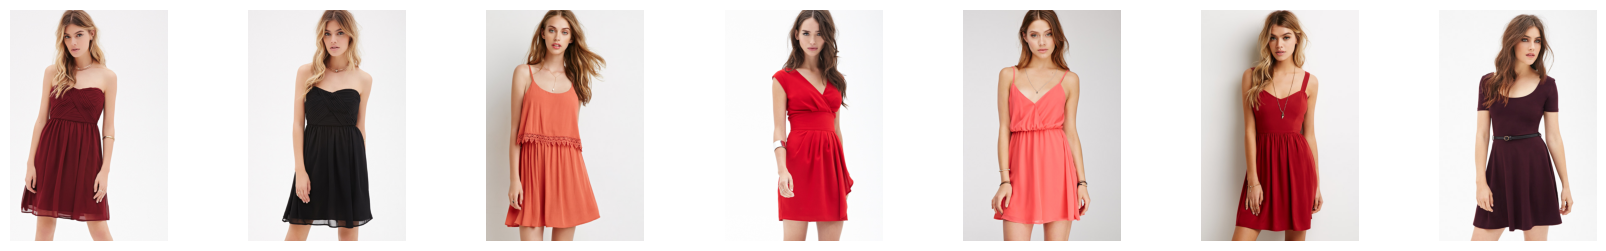

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(len(indices[0])*3, 3))
for i, idx in enumerate(indices[0]):
    img = plt.imread(filenames[idx])
    fig.add_subplot(1, len(indices[0]), i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

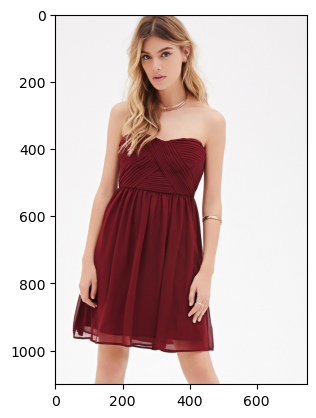

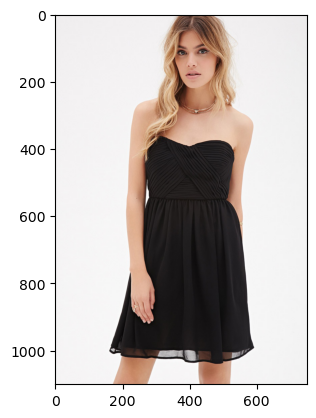

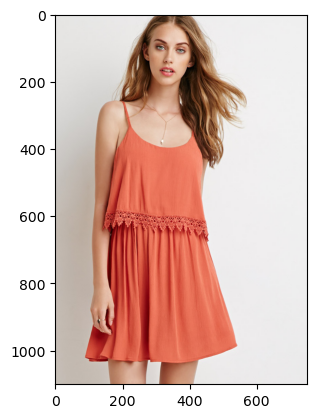

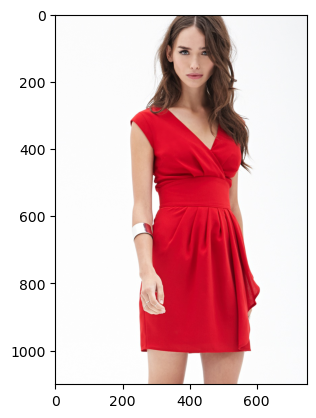

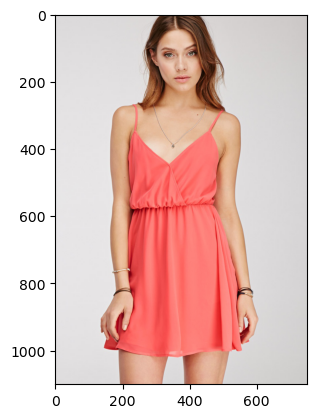

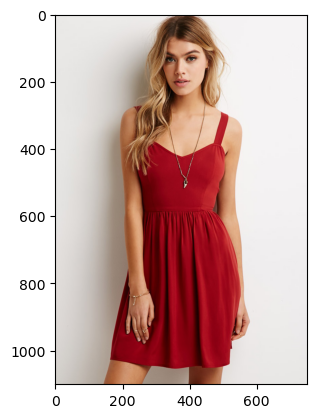

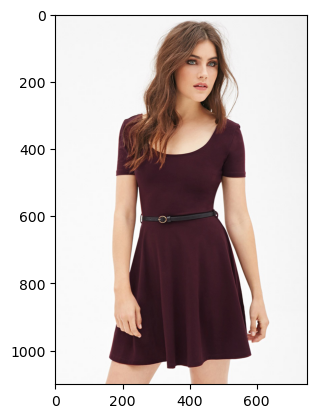

In [15]:
for i in indices[0]:
    img = plt.imread(filenames[i])
    plt.imshow(img)
    plt.show()

In [108]:
for file in indices[0][1:6]:
    print(filenames[file])
    temp_img = cv2.imread(filenames[file])
    if temp_img is not None:
        print(temp_img.shape)
        cv2.namedWindow('output', cv2.WINDOW_NORMAL)
        cv2.imshow('output',temp_img)
        cv2.waitKey(0)
    else:
        print('Error: could not read image file')
   

D:\deepfashion dataset\images\4726_032.jpg
(1101, 750, 3)
D:\deepfashion dataset\images\5348_021.jpg
(1101, 750, 3)
D:\deepfashion dataset\images\3820_021.jpg
(1101, 750, 3)
D:\deepfashion dataset\images\4398_012.jpg
(1101, 750, 3)
D:\deepfashion dataset\images\3482_021.jpg
(1101, 750, 3)


In [25]:
feature_list = np.load(r'C:\Users\stacy\Downloads\embeddings (2).pkl', allow_pickle=True)
filenames = np.load(r'C:\Users\stacy\Downloads\filenames (1).pkl', allow_pickle=True)

In [27]:
feature_list = np.array(feature_list)
filenames = np.array(filenames)

In [29]:
print(feature_list.shape)
print(filenames.shape)

(13752, 2048)
(13752,)


In [31]:
print(indices.shape)

(1, 7)


In [33]:
print(img_array.shape)

(224, 224, 3)


In [17]:
print(len(filenames))
print(len(indices))

13752
1


In [18]:
import random
from sklearn.metrics import confusion_matrix


# Generate a list of random indices
indices = [random.randint(0, 9) for _ in range(len(filenames))]

# Check that the length of the indices list is now the same as the filenames list
assert len(filenames) == len(indices)

# Create a confusion matrix
indices_str = [str(i) for i in indices]
cm = confusion_matrix(filenames, indices_str)

# Create a classification report
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(filenames, indices_str)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


C:\Users\stacy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stacy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stacy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stacy\anaconda3\lib\site-packages\sklearn\metrics\_cla

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]

Classification Report:
                                             precision    recall  f1-score   support

                                         0       0.00      0.00      0.00       0.0
                                         1       0.00      0.00      0.00       0.0
                                         2       0.00      0.00      0.00       0.0
                                         3       0.00      0.00      0.00       0.0
                                         4       0.00      0.00      0.00       0.0
                                         5       0.00      0.00      0.00       0.0
                                         6       0.00      0.00      0.00       0.0
                                         7       0.00      0.00      0.00       0.0
                                         8       0.00      0.00      0.00      

C:\Users\stacy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stacy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix
indices_str = [str(i) for i in indices]
cm = confusion_matrix(filenames, indices_str)
classes = unique_labels(filenames, indices_str)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


In [26]:
if type(indices) == str and type(img) == str:
    relevant_filenames = [f for f in file if f.split('/')[0] == img.split('.')[0]]
    num_correct += len(relevant_filenames)
    num_total += 1
    num_relevant += len(os.listdir(os.path.join('D:/deepfashion dataset/Test', img.split('.')[0])))
    num_retrieved += len(retrieved_filenames)
else:
    print("Error: filenames and img should both be strings")


Error: filenames and img should both be strings


In [43]:
img=image.load_img('D:/deepfashion dataset/Test/1282_011.jpg',target_size=(224,224))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_img).flatten()
normalized_result=result/norm(result)
    
#return normalized_result

1/1 [==============================] - 0s 187ms/step


In [46]:
import os
from PIL import Image

def get_true_label(img_path):
    """
    Returns the true label of an image based on its filename.

    Parameters:
    img_path (str): the path of the image file

    Returns:
    str: the true label of the image
    """
    filename = os.path.basename(img_path)
    label = filename.split('_')[1]
    return label

img_path = 'D:/deepfashion dataset/Test/1282_011.jpg'
img = Image.open(img_path)
true_label = get_true_label(img_path)


In [47]:
# Compute the predicted label using the KNN model
normalized_feature = model.predict(img).flatten() / np.linalg.norm(model.predict(img).flatten())
distances, indices = neighbors.kneighbors([normalized_feature])
predicted_label = features[indices[0][0]]

ValueError: Failed to find data adapter that can handle input: <class 'PIL.JpegImagePlugin.JpegImageFile'>, <class 'NoneType'>

In [41]:
# Convert indices to predicted labels
predicted_labels = [filenames[i] for i in indices[0]]
# Measure accuracy of k-NN model
true_labels = [test_labels[0]] * len(predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)